In [3]:
!pip install yellowbrick


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [6]:
data = pd.read_csv('Dataset-Tugas.csv')
data.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### EDA

In [7]:
data.shape

(150, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [11]:
data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
data.drop(columns='class', inplace=True)

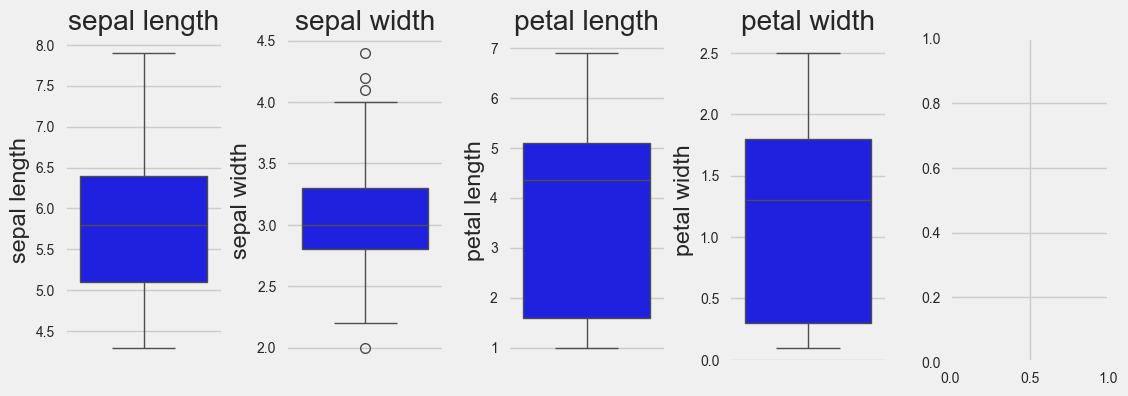

In [14]:
def box_plot(data):
    variables = data.select_dtypes(exclude='object').columns #definisi variabel yang akan divisualisasikan

    fig, axes =plt.subplots(1, 5, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color="blue", ax=axes[i])
        axes[i].set_title(var)
    plt.show()

box_plot(data) #panggil fungsi box plot dengan data yang sesuai

Pada data sepal lenght sebaran data cukup merata dengan median berada di sekitar 6.5, yang berarti setengah sepal length di atas 6.5 dan setengahnya di bawah. sedangkan sebaran data sepal  width juga cukup merata dengan sedikit outlier di bagian atas serta mediannya sekitar 3. pada petal length memiliki jarak yang lebih kecil dibandingkan sepal length dengan median sekitar 4.5. serta petal width juga memiliki rentang yang kecil dan mediannya sekitar 1.5

### Pre-processing

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['petal length'] = le.fit_transform(data['petal length'])
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,4,0.2
1,4.9,3.0,4,0.2
2,4.7,3.2,3,0.2
3,4.6,3.1,5,0.2
4,5.0,3.6,4,0.2


In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.22222222, 0.625     , 0.0952381 , 0.04166667],
       [0.16666667, 0.41666667, 0.0952381 , 0.04166667],
       [0.11111111, 0.5       , 0.07142857, 0.04166667],
       [0.08333333, 0.45833333, 0.11904762, 0.04166667],
       [0.19444444, 0.66666667, 0.0952381 , 0.04166667],
       [0.30555556, 0.79166667, 0.16666667, 0.125     ],
       [0.08333333, 0.58333333, 0.0952381 , 0.08333333],
       [0.19444444, 0.58333333, 0.11904762, 0.04166667],
       [0.02777778, 0.375     , 0.0952381 , 0.04166667],
       [0.16666667, 0.45833333, 0.11904762, 0.        ],
       [0.30555556, 0.70833333, 0.11904762, 0.04166667],
       [0.13888889, 0.58333333, 0.14285714, 0.04166667],
       [0.13888889, 0.41666667, 0.0952381 , 0.        ],
       [0.        , 0.41666667, 0.02380952, 0.        ],
       [0.41666667, 0.83333333, 0.04761905, 0.04166667],
       [0.38888889, 1.        , 0.11904762, 0.125     ],
       [0.30555556, 0.79166667, 0.07142857, 0.125     ],
       [0.22222222, 0.625     ,

### Modelling

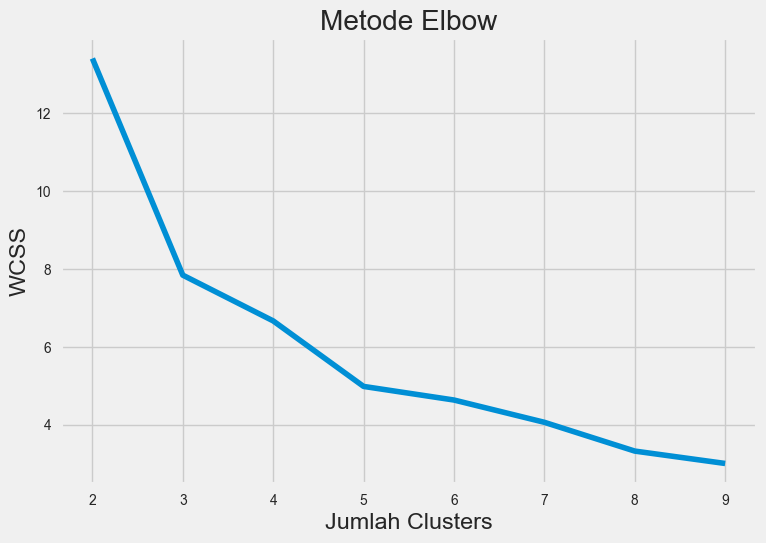

In [18]:
wcss = []
for i in range (2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range (2, 10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

Pada grafik diatas, terlihat bahwa nilai WCSS menurun drastis saat jumlah cluster bertambah dari 2 ke 3. Setelah itu, penurunan nilai WCSS terus berlanjut, namun dengan laju yang lebih lambat yang membentuk titik-titik pada grafik ini dianggap sebagai jumlah cluster yang optimal, berarti dengan menggunakan 3 cluster, kita dapat mengelompokkan data dengan lebih baik.

In [19]:
# menjalakan K-means Clustering ke dataset
model1= KMeans(n_clusters=2, init='k-means++', random_state=42)
y_pred1=model1.fit_predict(X_scaled)

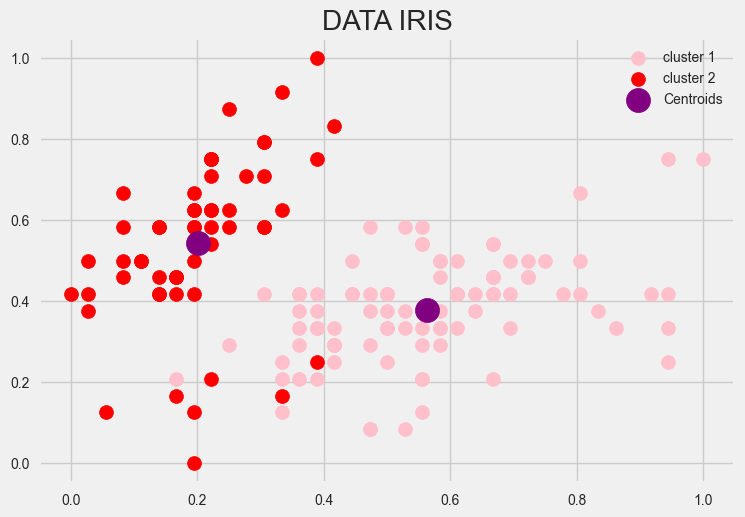

In [21]:
plt.scatter(X_scaled[y_pred1==0, 0], X_scaled[y_pred1==0, 1],
            s = 100, c = 'pink', label = "cluster 1")

plt.scatter(X_scaled[y_pred1==1, 0], X_scaled[y_pred1==1, 1],
            s = 100, c = 'red', label = "cluster 2")

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'purple', label = 'Centroids')

plt.title('DATA IRIS')
plt.legend()
plt.show()

terdapat dua kelompok data yang jelas terlihat, yang diwakili oleh titik-titik berwarna merah muda (cluster 1) dan merah (cluster 2). ini menunjukkan bahwa algoritma clustering telah berhasil membagi data menjadi dua kelompok yang berbeda. titik berwarna ungu yang lebih besar mewakili pusat dari masing-masing cluster bernama centroid yang merupakan titik rata-rata dari semua titik data dalam satu cluster. kedua cluster terlihat cukup terpisah satu sama lain, menunjukkan bahwa algoritma clustering telah melakukan pekerjaan yang baik dalam mengidentifikasi perbedaan antara kedua kelompok data.

In [22]:
#membuat objek DBScan dengan parameter epsilon dan jumlah minimum sampel
model2=DBSCAN(eps=1, min_samples=5)
model2.fit(X_scaled)
y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
data['petal length'] = model2.labels_
data.head(10)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,0,0.2
1,4.9,3.0,0,0.2
2,4.7,3.2,0,0.2
3,4.6,3.1,0,0.2
4,5.0,3.6,0,0.2
5,5.4,3.9,0,0.4
6,4.6,3.4,0,0.3
7,5.0,3.4,0,0.2
8,4.4,2.9,0,0.2
9,4.9,3.1,0,0.1


In [25]:
means = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred_3 = means.fit_predict(X_scaled)

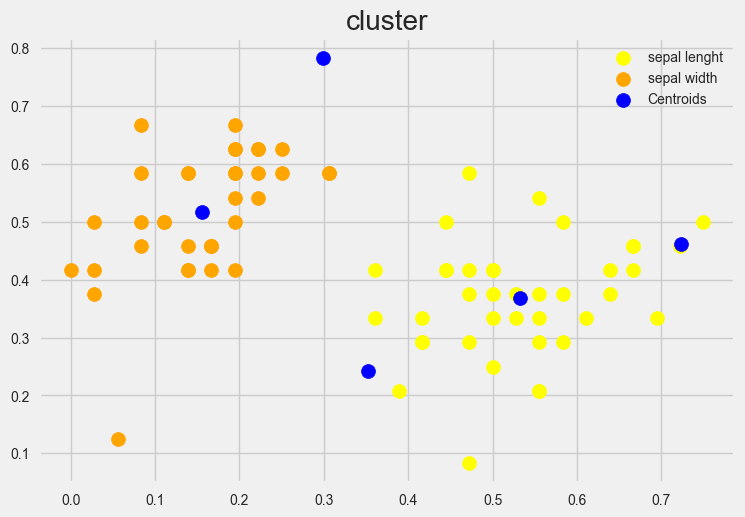

In [28]:
plt.scatter(X_scaled[y_pred_3 == 0, 0], X_scaled[y_pred_3 == 0, 1], s = 100, c = 'yellow', label = 'sepal lenght')
plt.scatter(X_scaled[y_pred_3 == 1, 0], X_scaled[y_pred_3 == 1, 1], s = 100, c = 'orange', label = 'sepal width')
plt.scatter(means.cluster_centers_[:, 0], means.cluster_centers_[:, 1], s = 100, c = 'blue', label = 'Centroids')

plt.title('cluster')
plt.legend()
plt.show()

terdapat tiga kelompok yang berbeda berdasarkan karakteristik masing-masing cluster. Setiap kelompok memiliki karakteristik yang unik, yang ditunjukkan oleh posisi pada plot. pemisahan pada ketiga cluster terlihat cukup terpisah satu sama lain yang menunjukkan bahwa clustering telah melakukan pekerjaan yang baik dalam mengidentifikasi perbedaan antara ketiga kelompok data. centroid dari cluster kuning mewakili sepal lenght dengan karakteristik tertentu yang  jelas berbeda dari centroid cluster oranye yang mewakili sepal width.

In [29]:
data['Label_K-Means'] = means.labels_
data.head(10)

,sepal length,sepal width,petal length,petal width,Label_K-Means
0,5.1,3.5,0,0.2,1
1,4.9,3.0,0,0.2,1
2,4.7,3.2,0,0.2,1
3,4.6,3.1,0,0.2,1
4,5.0,3.6,0,0.2,1
5,5.4,3.9,0,0.4,2
6,4.6,3.4,0,0.3,1
7,5.0,3.4,0,0.2,1
8,4.4,2.9,0,0.2,1
9,4.9,3.1,0,0.1,1


In [40]:
dbs = DBSCAN(eps = 0.4, min_samples = 8)

dbs.fit(X_scaled)

y_pred_dbs = dbs.labels_
y_pred_dbs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Visualisasi

### Matriks Evaluasi

In [58]:
#menghitung silhoutte_score 
score = silhouette_score(X_scaled, y_pred1)
print('Silhouette Score K-Means 2 Cluster:', score)

#menghitung silhoutte_score dengan DBScan
dbs_score = davies_bouldin_score(X_scaled, y_pred_3)
print('DBI K-Means 2 Cluster:', dbs_score)

Silhouette Score K-Means 2 Cluster: 0.5689211872920736
DBI K-Means 2 Cluster: 0.9405178634355114


K-Means dengan 2 cluster dan DBSCAN memiliki Silhouette Score berbeda dengan K-Means 2 cluster sebesar 0.568 lebih rendah dibanding DBS yaitu 0.940. nilai DBI yang cukup tinggi mengindikasikan bahwa pemisahan antara cluster belum optimal. Ada kemungkinan perlu dilakukan penyesuaian pada jumlah cluster atau penggunaan algoritma clustering yang berbeda.

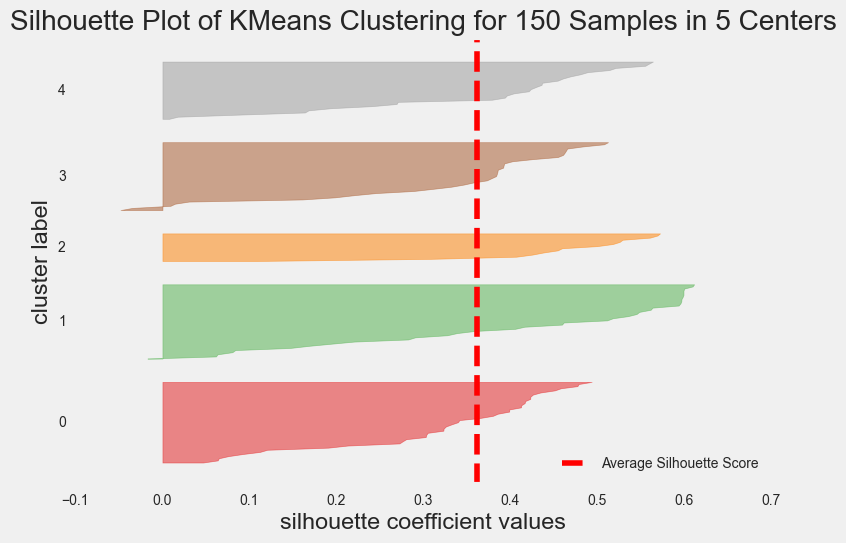

In [64]:
#membuat silhoutte visualisasi algoritma k-means 
silhouette_viz = SilhouetteVisualizer(means)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [69]:
# menghitung Davies-Bouldin Index (DBI) algoritma k-means 
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Boudin Index(DBI): ", dbi_score1)

Davies-Boudin Index(DBI):  0.5918767533747984


In [70]:
# menghitung Davies-Bouldin Index (DBI) algoritma k-means 
dbi_score2 = davies_bouldin_score(X_scaled, y_pred_3)
print("Davies-Boudin Index(DBI): ", dbi_score2)

Davies-Boudin Index(DBI):  0.9405178634355114
